# I. First part finding a good memory use. 

*how to choose the best one and why this choice made*


two options : **loading the file** to memory or **reading file** as a stream. Which one would be the best to choose ? Why ? What can allow us to do with this choice ? 

*First choice : Loading the file to memory*

* first, we generate the data files online 


In [ ]:
# this little part is given by the teacher, we're going to annotate or comment
# some lines in order to understand it better 


# first the importation : sys (paramètres et fonction propres à des systèmes) and numpy
import sys
import numpy as np

filelist={"A_dixmille.txt":10000,"B_centmille.txt":100000,"C_cinqcentmille.txt":500000,"D_unmillion.txt":1000000}

# this function is for seeding the generator 
# it is called when RandomState is initialized
np.random.seed(42) # Common seed for comparison between every participants


# this lines after the for allow us to open the file and .. 
for filename, dataSize in filelist.items():
    f= open(filename,"w")
    for i in range(0,dataSize):
	    f.write("%d\r\n" % np.random.randint(-sys.maxsize-1,sys.maxsize))
      # np.random.randint : return random integers from low(inclusive) to high(exclusive)
    f.close

!ls -lh # Printing the list of file available

total 33M
-rw-r--r-- 1 root root 209K Feb 22 10:36 A_dixmille.txt
-rw-r--r-- 1 root root 2.1M Feb 22 10:36 B_centmille.txt
-rw-r--r-- 1 root root  11M Feb 22 10:36 C_cinqcentmille.txt
-rw-r--r-- 1 root root  21M Feb 22 10:36 D_unmillion.txt
drwxr-xr-x 1 root root 4.0K Feb  5 18:37 sample_data


* here we want to print the maximum value of each files, for that we open each one and apply a filter of the maxuimum one 

*we load line by line and compare the value* 

In [ ]:
#This function read the file then seek the maximum value
def filterMax(filename):
    with open(filename,"r") as f: # Opening the file in reading mode
        if f.mode == 'r': # If opening went well and the file is readable
      #Initialisation of max search
            first=True
            max_value=0

      # Loading the lines in an array, then running through the array
            for line in f.readlines():
                value = int(line) # String to int conversion
                if first or max_value < value: # Seeking maximum value
                    max_value=value
                    first=False
    return(max_value) # Printing the maximum value
print("Display the maximum of the file " +str(filterMax("A_dixmille.txt")))
print("Display the maximum of the file " +str(filterMax("B_centmille.txt")))
print("Display the maximum of the file " +str(filterMax("C_cinqcentmille.txt")))
print("Display the maximum of the file " +str(filterMax("D_unmillion.txt")))

Display the maximum of the file 9218164057221768836
Display the maximum of the file 9223225204532880781
Display the maximum of the file 9223340876113130336
Display the maximum of the file 9223360629790385418


* we re going to estimate the memory usage, for that we ll use the memory_profiler library and make a graph of the incrementation of the memory while the reading of the file and the function going on 

Requirement already up-to-date: memory_profiler in /usr/local/lib/python3.6/dist-packages (0.57.0)
[10000, 100000, 500000, 1000000]
[0.49609375, 6.80859375, 34.8046875, 70.3515625]


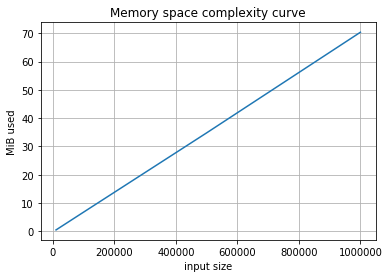

mememoty during execution =  [172.5703125, 172.5703125, 216.58984375, 242.921875, 242.921875, 242.921875, 173.33203125]


In [ ]:
!pip install -U memory_profiler # Install the needed library
from memory_profiler import memory_usage #Import the library

filelist={"A_dixmille.txt":10000,"B_centmille.txt":100000,"C_cinqcentmille.txt":500000,"D_unmillion.txt":1000000}
sizeList=[]
costList=[]

# We will iterate on each file to find the complexity curve
for filename,dataSize in filelist.items():
  sizeList.append(dataSize)
  mem_during_execution = memory_usage((filterMax,(filename,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
  memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
  costList.append(memory_increment)

print(sizeList)
print(costList)

#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above

fig, ax = plt.subplots()
ax.plot(sizeList, costList)

ax.set(xlabel='input size', ylabel='MiB used',
       title='Memory space complexity curve')
ax.grid()

plt.show()


print('mememoty during execution = ', mem_during_execution); 

In [ ]:
%memit max_value = filterMax("B_centmille.txt")
print(max_value)
%memit max_value = filterMax("C_cinqcentmille.txt")
print(max_value)
%memit max_value = filterMax("D_unmillion.txt")
print(max_value)

peak memory: 180.42 MiB, increment: 6.47 MiB
9223225204532880781
peak memory: 208.17 MiB, increment: 34.06 MiB
9223340876113130336
peak memory: 243.25 MiB, increment: 69.12 MiB
9223360629790385418


*Second choice : Reading file as a stream (without loading it to memory)*

In [ ]:
#This function read the file AS A STREAM seek the maximum value on the go
def filterMaxByLine(filename):
  with open(filename,"r") as f: # Opening the file in reading mode
    if f.mode == 'r': # If opening went well and the file is readable
      #Initialisation of max search
      first=True
      max_value=0

      line = f.readline() # Loading the first line
      while line: # While there is new line to be read
        value = int(line) # String to int conversion
        if first or max_value < value: # Seeking maximum value
          max_value=value
          first=False
        line = f.readline() # Loading the next line
    return(max_value) # Printing the maximum value

In [ ]:
%load_ext memory_profiler
%memit max_value = filterMaxByLine("B_centmille.txt")
print(max_value)
%memit max_value = filterMaxByLine("C_cinqcentmille.txt")
print(max_value)
%memit max_value = filterMaxByLine("D_unmillion.txt")
print(max_value)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 174.13 MiB, increment: 0.00 MiB
9223225204532880781
peak memory: 174.13 MiB, increment: 0.00 MiB
9223340876113130336
peak memory: 174.13 MiB, increment: 0.00 MiB
9223360629790385418


Conclusion of the choice : 

we can compare the two ways of dealing with the memory 
we can choose the second one because loading a whole file can take some time and a lot of useless memory 
by reading line by line we can go faster and upload just the usefull data needed 

## II. Function for A_dixmille.txt

with this couple lines we take the first file of 10 thousand data and we read the file line by line and make a list of the 100th maximum values 

In [ ]:
import random
def filterByLine(file):
# we open the file 
  filename = open(file,'r')
  list = random.sample(range(0,100), 100) # random.sample returns a particular length list of items chosen from the sequence
​
​#we read the file line by line 
for line in filename.readline():
    min_list_index = list.index(min(list))
    if int(line) > min(list) :
        list[min_list_index] = int(line)        
​
​
print("The value max of the list " + str(max(list)))
print(list)
    
filterByLine("A_dixmille.txt")

SyntaxError: ignored

*code for calculating the use of the memory for the previous function used*

* calculation of the evolution of the memory used when we take the file of 10 thousand data 

Requirement already up-to-date: memory_profiler in /usr/local/lib/python3.6/dist-packages (0.57.0)
[10000, 100000, 500000, 1000000]
[0.0, 0.0, 0.0, 0.0]
peak memory: 174.38 MiB, increment: 0.00 MiB
9223360629790385418


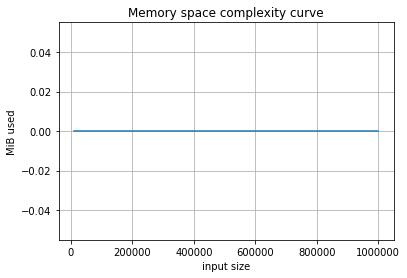

In [ ]:
!pip install -U memory_profiler # Install the needed library
from memory_profiler import memory_usage #Import the library

filelist={"A_dixmille.txt":10000,"B_centmille.txt":100000,"C_cinqcentmille.txt":500000,"D_unmillion.txt":1000000}
sizeList=[]
costList=[]

# We will iterate on each file to find the complexity curve
for file,dataSize in filelist.items():
    sizeList.append(dataSize)
    mem_during_execution = memory_usage((filterMaxByLine,(file,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
    memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
    costList.append(memory_increment)

print(sizeList)
print(costList)

#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above
filename= open("A_dixmille.txt","r")

%memit max_value = filterMaxByLine(file)
print(max_value)

fig, ax = plt.subplots()
ax.plot(sizeList, costList)

ax.set(xlabel='input size', ylabel='MiB used',
       title='Memory space complexity curve')
ax.grid()

plt.show()

* here we calculate the time complexity, we want to optimize it in our code

[10000, 100000, 500000, 1000000]
[60369, 600612, 3000777, 6000377]


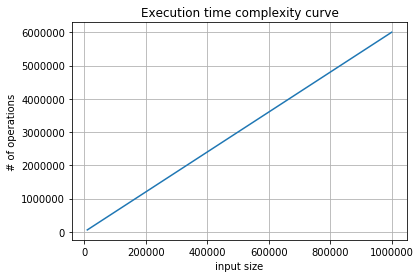

In [ ]:
!pip install pprofile
import pprofile
import pstats
import numpy as np

filelist={"A_dixmille.txt":10000,"B_centmille.txt":100000,"C_cinqcentmille.txt":500000,"D_unmillion.txt":1000000}
sizeList=[]
costList=[]

# We will iterate on each file to find the complexity curve
for file,dataSize in filelist.items():
  sizeList.append(dataSize)

  prof = pprofile.Profile()
  prof.runcall(filterMaxByLine, file)
  timingFile = list(prof.file_dict.values())[0][0]
  costList.append(timingFile.getTotalHitCount())

print(sizeList)
print(costList)


import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above
filename= open("A_dixmille.txt","r")

fig, ax = plt.subplots()
ax.plot(sizeList, costList)

ax.set(xlabel='input size', ylabel='# of operations',
       title='Execution time complexity curve')
ax.grid()

plt.show()

## III. Worst and Best case for the code 

*We now want to calculate the* **worst case**

* for the memory

Requirement already up-to-date: memory_profiler in /usr/local/lib/python3.6/dist-packages (0.57.0)
[10000, 100000, 500000, 1000000, 1000000]
[0.0, 0.0, 0.0, 0.0, 0.0]
peak memory: 175.04 MiB, increment: 0.00 MiB
[999900, 999901, 999902, 999903, 999904, 999905, 999906, 999907, 999908, 999909, 999910, 999911, 999912, 999913, 999914, 999915, 999916, 999917, 999918, 999919, 999920, 999921, 999922, 999923, 999924, 999925, 999926, 999927, 999928, 999929, 999930, 999931, 999932, 999933, 999934, 999935, 999936, 999937, 999938, 999939, 999940, 999941, 999942, 999943, 999944, 999945, 999946, 999947, 999948, 999949, 999950, 999951, 999952, 999953, 999954, 999955, 999956, 999957, 999958, 999959, 999960, 999961, 999962, 999963, 999964, 999965, 999966, 999967, 999968, 999969, 999970, 999971, 999972, 999973, 999974, 999975, 999976, 999977, 999978, 999979, 999980, 999981, 999982, 999983, 999984, 999985, 999986, 999987, 999988, 999989, 999990, 999991, 999992, 999993, 999994, 999995, 999996, 999997, 999

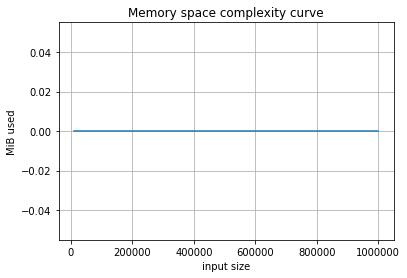

In [ ]:
!pip install -U memory_profiler # Install the needed library
from memory_profiler import memory_usage #Import the library

filelist={"A_dixmille.txt":10000,"B_centmille.txt":100000,"C_cinqcentmille.txt":500000,"D_unmillion.txt":1000000,'worst_case.txt':1000000}
sizeList=[]
costList=[]

# We will iterate on each file to find the complexity curve
for filename,dataSize in filelist.items():
    sizeList.append(dataSize)
    mem_during_execution = memory_usage((filterMaxByLine,(filename,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
    memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
    costList.append(memory_increment)

print(sizeList)
print(costList)

#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above
filename = open("worst_case.txt","r")

%memit max_value = filterMaxByLine("worst_case.txt")
print(max_value)

fig, ax = plt.subplots()
ax.plot(sizeList, costList)

ax.set(xlabel='input size', ylabel='MiB used',
       title='Memory space complexity curve')
ax.grid()

plt.show()

* for the time complexity

  Created wheel for pprofile: filename=pprofile-2.0.2-cp36-none-any.whl size=34079 sha256=d622ccc411c634240b6443cd7bb533ccb6a57c38924fa4537c9da17593c99cb1
  Stored in directory: /root/.cache/pip/wheels/e6/09/3f/d834c2f19fd7f80e5f5369b5372485ca044efba8ea1742888f
Successfully built pprofile
[0, 100000]
[0, 6999807]


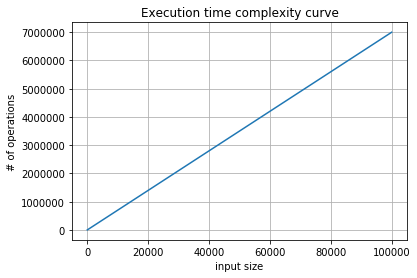

In [ ]:
!pip install pprofile
import pprofile
import pstats
import numpy as np

filelist={"worst_case.txt":100000}
sizeList=[]
sizeList.append(0)
costList=[]
costList.append(0)

# We will iterate on each file to find the complexity curve
for file,dataSize in filelist.items():
  sizeList.append(dataSize)

  prof = pprofile.Profile()
  prof.runcall(filterMaxByLine, file)
  timingFile = list(prof.file_dict.values())[0][0]
  costList.append(timingFile.getTotalHitCount())

print(sizeList)
print(costList)


import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above

fig, ax = plt.subplots()
ax.plot(sizeList, costList)

ax.set(xlabel='input size', ylabel='# of operations',
       title='Execution time complexity curve')
ax.grid()

plt.show()

*we want now to calculate it for the* **best case**



*   memory usage



In [ ]:
!pip install -U memory_profiler # Install the needed library
from memory_profiler import memory_usage #Import the library

filelist={"A_dixmille.txt":10000,"B_centmille.txt":100000,"C_cinqcentmille.txt":500000,"D_unmillion.txt":1000000,'best_case.txt':1000000}
sizeList=[]
costList=[]


# We will iterate on each file to find the complexity curve
for file,dataSize in filelist.items():
    sizeList.append(dataSize)
    mem_during_execution = memory_usage((filterMaxByLine,(file,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
    memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
    costList.append(memory_increment)

print(sizeList)
print(costList)

#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above
file= open("best_case.txt","r")

%memit max_value = filterMaxByLine('best_case.txt')
print(max_value)

fig, ax = plt.subplots()
ax.plot(sizeList, costList)

ax.set(xlabel='input size', ylabel='MiB used',
       title='Memory space complexity curve')
ax.grid()

plt.show()



*   time complexity



In [ ]:
!pip install pprofile
import pprofile
import pstats
import numpy as np

filelist={'best_case.txt':1000000}
sizeList=[]
sizeList.append(0)
costList=[]
costList.append(0)

# We will iterate on each file to find the complexity curve
for file,dataSize in filelist.items():
  sizeList.append(dataSize)

  prof = pprofile.Profile()
  prof.runcall(filterMaxByLine, file)
  timingFile = list(prof.file_dict.values())[0][0]
  costList.append(timingFile.getTotalHitCount())

print(sizeList)
print(costList)


import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above

fig, ax = plt.subplots()
ax.plot(sizeList, costList)

ax.set(xlabel='input size', ylabel='# of operations',
       title='Execution time complexity curve')
ax.grid()

plt.show()